# S09_T02_Supervisat_Regressio

In [40]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats
from scipy.stats import norm
from scipy import stats
from scipy.stats import t
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
from numpy.polynomial.polynomial import polyfit
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from IPython.display import HTML, display_html, display

## Exercici 1. Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv

De l'exercici S09_T01, hem guardat com a csv el dataframe vols05, que està net de NaN i que conté els dummies de CancellationCode. L'importem i extraiem informació.

In [2]:
vols = pd.read_csv('//home/rusi/Escritorio/rubenIT/DataSources/vols05.csv')#importem i li assignem un nom de dataframe

In [3]:
print(vols.info())
print(vols.describe())
print(vols.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Unnamed: 0.1       int64  
 2   Year               int64  
 3   Month              int64  
 4   DayofMonth         int64  
 5   DayOfWeek          int64  
 6   DepTime            float64
 7   CRSDepTime         int64  
 8   ArrTime            float64
 9   CRSArrTime         int64  
 10  UniqueCarrier      object 
 11  FlightNum          int64  
 12  TailNum            object 
 13  ActualElapsedTime  float64
 14  CRSElapsedTime     float64
 15  AirTime            float64
 16  ArrDelay           float64
 17  DepDelay           float64
 18  Origin             object 
 19  Dest               object 
 20  Distance           int64  
 21  TaxiIn             float64
 22  TaxiOut            float64
 23  Cancelled          int64  
 24  CancellationCode   object 
 25  Diverted          

In [4]:
vols.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Year', 'Month', 'DayofMonth',
       'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'A', 'B', 'C', 'N'],
      dtype='object')

In [5]:
vols.describe(include = "all")

,Unnamed: 0,Unnamed: 0.1,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,A,B,C,N
count,1.936758e+06,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.683785e+05,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.604230e+03,1.634225e+03,...,4.003598e-03,1.235367e+01,2.385512e+00,9.675607e+00,5.805836e-02,1.629374e+01,1.270164e-04,1.585123e-04,4.130614e-05,9.996732e-01
std,5.590940e+05,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.557685e+02,4.646347e+02,...,6.314722e-02,3.613493e+01,1.734036e+01,2.808958e+01,1.623934e+00,3.585904e+01,1.126944e-02,1.258917e-02,6.426854e-03,1.807562e-02
min,0.000000e+00,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.841892e+05,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.313000e+03,1.325000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,9.683785e+05,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.714000e+03,1.705000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.452568e+06,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,...,0.000000e+00,1.000000e+01,0.000000e+00,6.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


Prescindim de les columnes Unnamed, que són repeticions de l'índex.

In [6]:
vols02=vols.drop(columns=["Unnamed: 0","Unnamed: 0.1"])

In [7]:
vols02.describe(include="all")

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,A,B,C,N
count,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1936758,1.936758e+06,...,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377602,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.604230e+03,1.634225e+03,NaN,2.184263e+03,...,4.003598e-03,1.235367e+01,2.385512e+00,9.675607e+00,5.805836e-02,1.629374e+01,1.270164e-04,1.585123e-04,4.130614e-05,9.996732e-01
std,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.557685e+02,4.646347e+02,NaN,1.944702e+03,...,6.314722e-02,3.613493e+01,1.734036e+01,2.808958e+01,1.623934e+00,3.585904e+01,1.126944e-02,1.258917e-02,6.426854e-03,1.807562e-02
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.313000e+03,1.325000e+03,NaN,6.100000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.714000e+03,1.705000e+03,NaN,1.543000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,NaN,3.422000e+03,...,0.000000e+00,1.000000e+01,0.000000e+00,6.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


Preparem *x* i *y* train, amb el target "ArrDelay". Ho farem amb 2/3 de les mostres per entrenar, i 1/3 per test. Eliminem de *x* els atributs categòrics.

In [8]:
x=vols02.drop(columns=["ArrDelay","TailNum","Origin","Dest","CancellationCode","UniqueCarrier"])
y=vols02.ArrDelay
print(x.describe(include="all"))
print(y.describe(include="all"))

            Year         Month    DayofMonth     DayOfWeek       DepTime  \
count  1936758.0  1.936758e+06  1.936758e+06  1.936758e+06  1.936758e+06   
mean      2008.0  6.111106e+00  1.575347e+01  3.984827e+00  1.518534e+03   
std          0.0  3.482546e+00  8.776272e+00  1.995966e+00  4.504853e+02   
min       2008.0  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%       2008.0  3.000000e+00  8.000000e+00  2.000000e+00  1.203000e+03   
50%       2008.0  6.000000e+00  1.600000e+01  4.000000e+00  1.545000e+03   
75%       2008.0  9.000000e+00  2.300000e+01  6.000000e+00  1.900000e+03   
max       2008.0  1.200000e+01  3.100000e+01  7.000000e+00  2.400000e+03   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  1.936758e+06  1.936758e+06  1.936758e+06  1.936758e+06   
mean   1.467473e+03  1.604230e+03  1.634225e+03  2.184263e+03   
std    4.247668e+02  5.557685e+02  4.646347e+02  1.944702e+03   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.0000

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=4)

In [10]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1297627, 27) (639131, 27) (1297627,) (639131,)


In [11]:
print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297627 entries, 84384 to 1000570
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1297627 non-null  int64  
 1   Month              1297627 non-null  int64  
 2   DayofMonth         1297627 non-null  int64  
 3   DayOfWeek          1297627 non-null  int64  
 4   DepTime            1297627 non-null  float64
 5   CRSDepTime         1297627 non-null  int64  
 6   ArrTime            1297627 non-null  float64
 7   CRSArrTime         1297627 non-null  int64  
 8   FlightNum          1297627 non-null  int64  
 9   ActualElapsedTime  1297627 non-null  float64
 10  CRSElapsedTime     1297627 non-null  float64
 11  AirTime            1297627 non-null  float64
 12  DepDelay           1297627 non-null  float64
 13  Distance           1297627 non-null  int64  
 14  TaxiIn             1297627 non-null  float64
 15  TaxiOut            1297627 n

### 1r mètode: Linear Regression

In [12]:
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

In [13]:
predictions = lm.predict(x)
print("Predictions: " + str(predictions))
print("Score or R^2 de train: " + str(lm.score(x,y)))
print("Coefficient: " + str(lm.coef_))
print("Intercept: " + str(lm.intercept_))

Predictions: [-2.81271377  1.98035663  5.74663751 ... 98.54910934  3.82583212
  0.40925135]
Score or R^2 de train: 0.9947825425307268
Coefficient: [-4.52775230e-14 -8.27401904e-03  1.12753522e-03 -3.09888710e-03
 -1.89733176e-04  4.00379087e-05 -4.45443075e-05  2.96271730e-05
 -2.96509240e-05  1.34146007e-01 -2.84455923e-01  1.17761675e-01
  2.85365272e-01  3.19204818e-03  1.59968494e-01  1.52633566e-01
  2.21135916e-02  1.81994144e+01  7.05057714e-01  7.07102473e-01
  7.05888811e-01  6.91223937e-01  7.02423467e-01  3.13258569e+00
  3.97447238e+00 -7.08494448e+00 -2.21135916e-02]
Intercept: 2.6788699047290265


**Conclusió**: *score* és el percentatge de variança explicada de la predicció. Observem que és molt elevada, del 99,47%. Això ens fa pensar que estem en un cas de overfitting (a partir del 90% s'assumeix que és així). Decidim limitar les variables d'entrada mitjançant una taula de correlació.

In [14]:
#Traiem les columnes Object o categòriques del DF
vols03=vols02.drop(columns=["TailNum","Origin","Dest","CancellationCode","UniqueCarrier","A","B","C","N"])

Text(0.5, 1.0, 'Mapa de calor amb Seaborn')

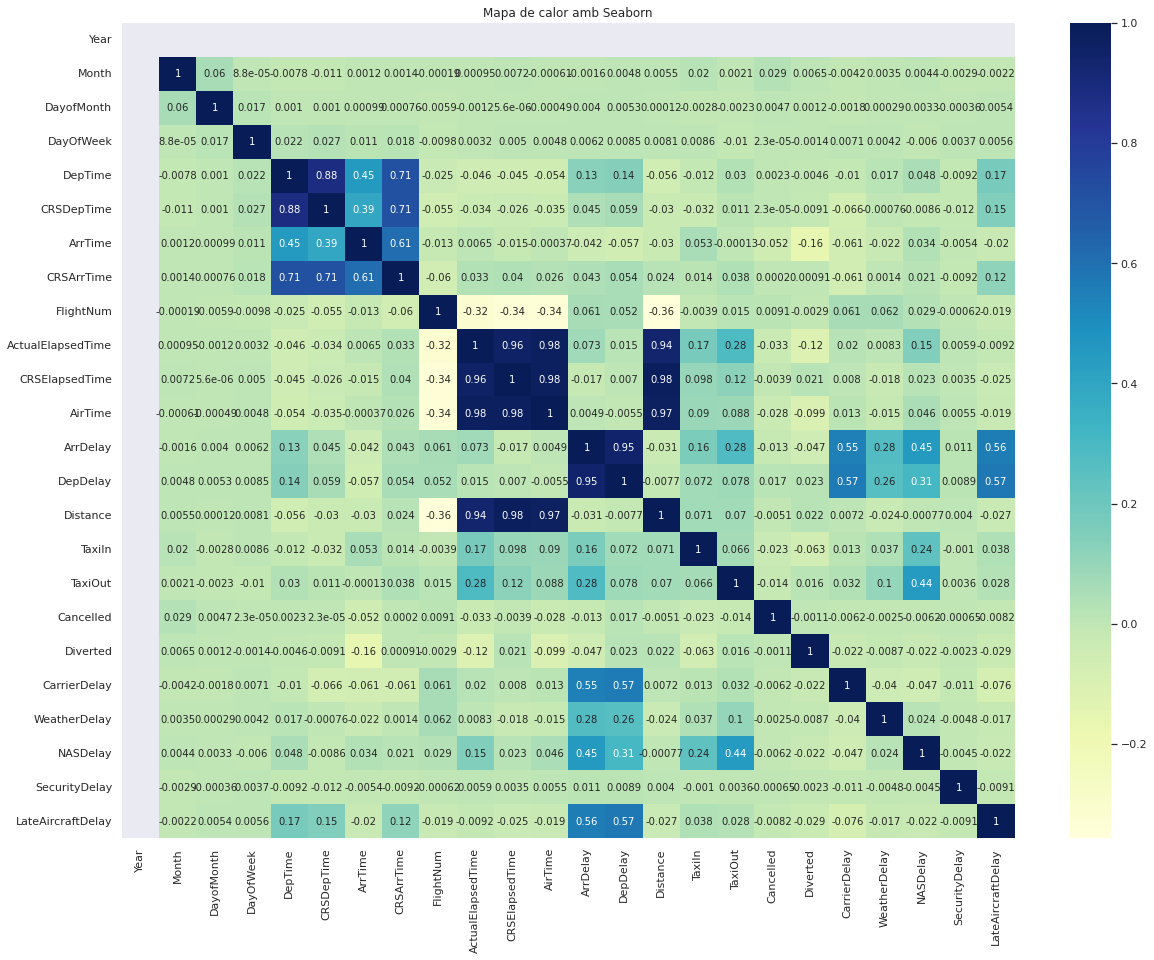

In [15]:
#Fem el mapa de calor.
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(vols03.corr(),cmap="YlGnBu",annot=True,annot_kws={"fontsize":10})
plt.title("Mapa de calor amb Seaborn")

Comprovem que les variables de més correlació amb "ArrDelay" són "DepDelay", "LateAircraftDelay", "NASDelay", "CarrierDelay", "TaxiOut" i "TaxiIn". Escollim la primera, "DepDelay" per fer el nostre x_train.

In [16]:
x02=vols03.loc[:,["DepDelay"]]
y02=y

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x02, y02, test_size=0.33, random_state=4)

In [18]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1297627, 1) (639131, 1) (1297627,) (639131,)


In [19]:
model02 = lm.fit(x02,y02)

In [20]:
predictions02 = lm.predict(x02)
print("Predictions: " + str(predictions02))
print("Score or R^2 de train: " + str(lm.score(x02,y02)))
print("Coefficient: " + str(lm.coef_))
print("Intercept: " + str(lm.intercept_))
print("Funció: f(x) = " + str(lm.intercept_)+str("+")+str(lm.coef_)+str("x") )

Predictions: [ 6.65830465 17.71259623  6.65830465 ... 79.01366773  9.67311145
  5.65336905]
Score or R^2 de train: 0.8949198002949563
Coefficient: [1.0049356]
Intercept: -1.3811801343341656
Funció: f(x) = -1.3811801343341656+[1.0049356]x


Ara tenim un Score o R^2 de 0.895 (aproximadament 89,49% per fer prediccions). És força elevat, però no tant com el 99,47% anterior quan hem fet servir múltiples variables, i amb molta menys informació (més àgil, només una variable independent i una altra dependent).

𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥

Text(0, 0.5, 'ArrDelay [min]')

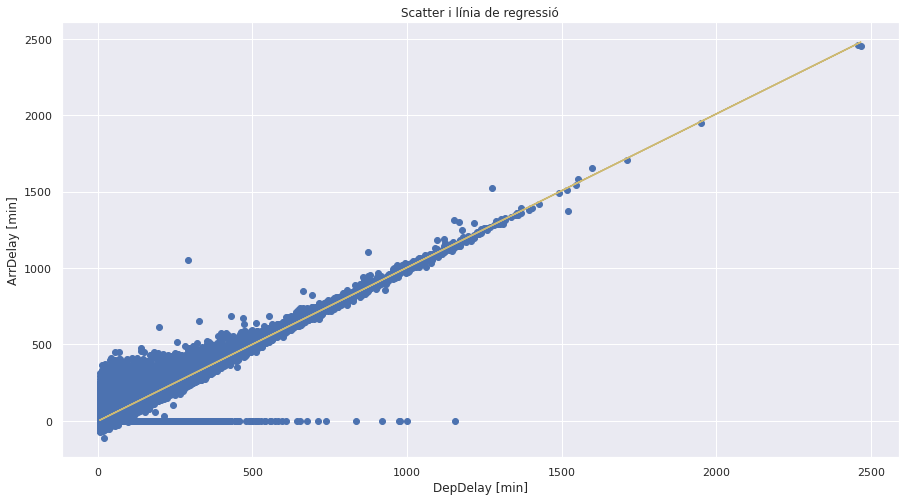

In [21]:
fig, ax1 = plt.subplots(figsize = (15, 8))
ax1.scatter(x02,y02)
#Afegim regressió lineal y = b + mx
ax1.plot(x02,lm.intercept_+lm.coef_*x02,"y-")
plt.title("Scatter i línia de regressió",fontsize=12)
plt.xlabel("DepDelay [min]")
plt.ylabel("ArrDelay [min]")

Si escollim 2 variables independents, el nostre score gairebé no millora.

In [22]:
x03=vols03.loc[:,["DepDelay","CarrierDelay"]]
y03=y

In [23]:
model03 = lm.fit(x03,y03)

In [24]:
predictions03 = lm.predict(x03)
print("Predictions: " + str(predictions03))
print("Score or R^2 de train: " + str(lm.score(x03,y03)))
print("Coefficient: " + str(lm.coef_))
print("Intercept: " + str(lm.intercept_))
print("Funció: f(x1,x2) = " + str(lm.intercept_)+str("+")+str(lm.coef_)+str("[x1 x2]") )

Predictions: [ 6.68558381 17.63556656  6.68558381 ... 78.38299798  9.67194275
  5.69013084]
Score or R^2 de train: 0.89508965463335
Coefficient: [0.99545298 0.0247998 ]
Intercept: -1.278040006297303
Funció: f(x1,x2) = -1.278040006297303+[0.99545298 0.0247998 ][x1 x2]


### 2n mètode: Decission tree regression

Donarem dues variables independents al model, perquè és el mínim que demana per fer la predicció.

In [25]:
regressor = DecisionTreeRegressor(random_state=42)

In [26]:
regressor.fit(x03,y03)

DecisionTreeRegressor(random_state=42)

In [27]:
#Fem la predicció
y_pred = regressor.predict(x03)
print(y_pred)

[ 3.60871741 13.8147651   3.60871741 ... 74.32758621  6.294882
  2.73703782]


In [28]:
score_decission_tree=cross_val_score(regressor, x03, y03, cv=10)
print(score_decission_tree)

[0.90347232 0.90406082 0.90700274 0.91368904 0.9038047  0.89352358
 0.90470976 0.91168082 0.9014503  0.8890381 ]


In [29]:
#Fem la mitja de tots els valors
score_decission_tree.mean()

0.9032432198660475

Si acceptem com a vàlida la mitjana del vector score del Decission Tree, veiem que aquest està una miqueta per sobre d'una regressió lineal amb dues variables (0,903 vs 0,895) en el moment de fer prediccions.

### 3r mètode: Multi-layer Perceptron Regressor with Neural Networks

In [33]:
x04=x03
y04=y
#make_regression(n_samples=20000, random_state=42)
x_train04, x_test04, y_train04, y_test04 = train_test_split(x04, y04,test_size=0.33,random_state=42)
regr = MLPRegressor(random_state=42, max_iter=200).fit(x_train04, y_train04)
print(regr.predict(x_test04[:50]))
print(regr.score(x_test04, y_test04))

/home/rusi/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[ 71.17336574 549.19982019  16.65483972  55.92729393   3.02286057
  25.86892646   3.02286057   5.88408193  15.33961189  92.69244438
 205.55480069  13.09287319  31.10036816  41.93865783  72.96667405
  14.02438407  25.8114385   67.70220345  11.45485734  33.06509273
   6.92204135  29.81444332  26.06193607  50.65879518 177.64151087
  33.95019257   4.8461225    3.02286057   2.06006785  45.22283073
   5.88408193  29.81444332  23.23097885  89.04258779  81.93880292
  49.04877801  75.95738367   5.88408193 274.10805933 110.140945
   7.90478883  19.98339638  55.92729393 146.73751143  10.60787984
  65.7088975   10.60787984   3.02286057   7.90478883  28.49189016]
0.9065681872472509


**Conclusió**: amb aquest mètode aconseguim un score de 0,907. És el millor mètode dels 3, però no hi ha una diferència notable que justifiqui el seu ús, ja que consumeix molta memòria i recursos (ha calgut interrompre el càlcul abans d'hora perquè trigava molta estona en donar el resultat).

## Exercici 2. Compara’ls en base al MSE i al R2 .

In [44]:
print(y03.describe())

count    1.936758e+06
mean     4.201714e+01
std      5.672935e+01
min     -1.090000e+02
25%      9.000000e+00
50%      2.400000e+01
75%      5.500000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64


### Comparació amb MSE (Mean Square Error)

In [38]:
#Agafem la predicció de la regressió lineal de l'exercici 1
y_pred = predictions03
mse = np.sqrt(mean_squared_error(y03, y_pred))
print(mse)

18.374554838652383


### Comparació amb R2 (Root Squared)

In [41]:
r2_score(y03, y_pred)

0.89508965463335

El valor de MSE és la quantificació de com de propers els nostres resultats de predicció es desvien del número actual. Tenint en compte que la mitjana dels valors reals de la variable dependent és 42.01, 18.37 seria un valor relativament proper a 0 i un bon indicador. El R2 de 0.895 així ens ho confirma, sent un percentatge força elevat.

## Exercici 3. Entrena’ls utilitzant els diferents paràmetres que admeten.

**Parameters R2**
-    y_true: array-like of shape (n_samples,) or (n_samples, n_outputs)
       Ground truth (correct) target values.
-    y_pred: array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
-    sample_weight: array-like of shape (n_samples,), default=None
        Sample weights.
-    multioutput{‘raw_values’, ‘uniform_average’, ‘variance_weighted’}, array-like of shape (n_outputs,) or None, default=’uniform_average’
        Defines aggregating of multiple output scores. Array-like value defines weights used to average scores. Default is “uniform_average”.
        ‘raw_values’ :
            Returns a full set of scores in case of multioutput input.
        ‘uniform_average’ :
            Scores of all outputs are averaged with uniform weight.
        ‘variance_weighted’ :
            Scores of all outputs are averaged, weighted by the variances of each individual output.
        Changed in version 0.19: Default value of multioutput is ‘uniform_average’.

In [54]:
print(r2_score(y03[:100], y_pred[0:100], multioutput="variance_weighted"))
print(r2_score(y03[:100], y_pred[0:100], multioutput="uniform_average"))

0.919984050494522
0.919984050494522


In [51]:
r2_score(y03[:1000], y_pred[0:1000], multioutput="variance_weighted")

0.9066342892918451

S'observa que el paràmetre multioutput no té repercusió, i que quan més petita sigui la mostra, més alt és el score.

**MSE Parameters**
-    y_true:array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
-    y_pred:array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
-    sample_weight:array-like of shape (n_samples,), default=None
        Sample weights.
-    multioutput:{‘raw_values’, ‘uniform_average’} or array-like of shape (n_outputs,), default=’uniform_average’
        Defines aggregating of multiple output values. Array-like value defines weights used to average errors.
        ‘raw_values’ :
            Returns a full set of errors in case of multioutput input.
        ‘uniform_average’ :
            Errors of all outputs are averaged with uniform weight.
-    squared: bool, default=True
        If True returns MSE value, if False returns RMSE value.

In [55]:
#Poques mostres i error quadrat. Retorna MSE
y_pred = predictions03
mse = np.sqrt(mean_squared_error(y03[0:100], y_pred[0:100], squared=True))
print(mse)

13.39184363600237


In [58]:
#Poques mostres i arrel de l'error quadrat mig RMSE
y_pred = predictions03
rmse = np.sqrt(mean_squared_error(y03[0:100], y_pred[0:100], squared=False))
print(rmse)

3.6594867995392977


RMSE és l'arrel de MSE, i amb poques mostres, ens apropem més a zero, que és un indicador de millora predictiva.

## Exercici 4. Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

Aquesta part ja s'ha fet al començament del primer exercici. Ens hem trobat davant un cas d'overfitting, amb un 0.9947 d'score. Repetim els passo fets a continuació.

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=4)
lm = linear_model.LinearRegression()
model = lm.fit(x,y)
predictions = lm.predict(x)
print("Predictions: " + str(predictions))
print("Score or R^2 de train: " + str(lm.score(x,y)))
print("Coefficient: " + str(lm.coef_))
print("Intercept: " + str(lm.intercept_))

Predictions: [-2.81271377  1.98035663  5.74663751 ... 98.54910934  3.82583212
  0.40925135]
Score or R^2 de train: 0.9947825425307268
Coefficient: [-4.52775230e-14 -8.27401904e-03  1.12753522e-03 -3.09888710e-03
 -1.89733176e-04  4.00379087e-05 -4.45443075e-05  2.96271730e-05
 -2.96509240e-05  1.34146007e-01 -2.84455923e-01  1.17761675e-01
  2.85365272e-01  3.19204818e-03  1.59968494e-01  1.52633566e-01
  2.21135916e-02  1.81994144e+01  7.05057714e-01  7.07102473e-01
  7.05888811e-01  6.91223937e-01  7.02423467e-01  3.13258569e+00
  3.97447238e+00 -7.08494448e+00 -2.21135916e-02]
Intercept: 2.6788699047290265


## Exercici 5. Realitza algun procés d’enginyeria de variables per millorar-ne la predicció (feature engineering)

## Exercici 6. No utilitzis la variable DepDelay a l’hora de fer prediccions